In [1]:
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [9]:
def load_data():
    # Load the training data
    train_data = datasets.CIFAR10(root='../data', train=True, download=True)
    # Load the test data
    test_data = datasets.CIFAR10(root='../data', train=False, download=True)

    return train_data, test_data

In [10]:
LABELS = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

Files already downloaded and verified
Files already downloaded and verified


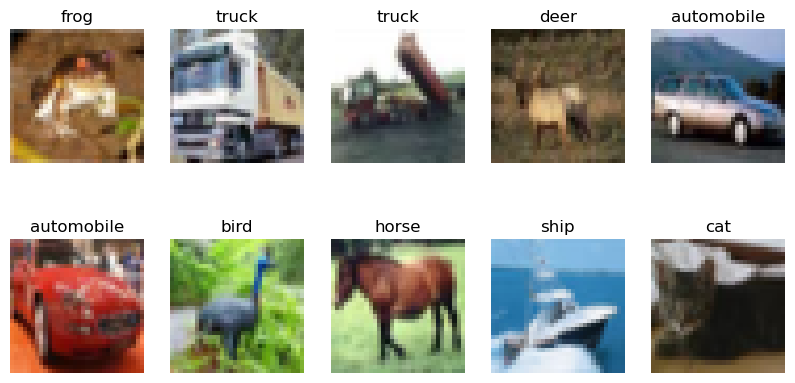

In [11]:
train_data, test_data = load_data()

# Display random 10 images in the training data in a 5x2 grid

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(10):
    img, label = train_data[i]
    axes[i].imshow(img)
    axes[i].set_title(LABELS[label])
    axes[i].axis('off')

# save fig
plt.savefig('../images/cifar10_sample.png')

In [5]:
FOLDER = "../test-imgs/"

# Load all the images from this folder and convert them to (3, 32, 32)

import os
import numpy as np

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = plt.imread(folder + filename)
        img = img.transpose(2, 0, 1)
        images.append(img)
    return images

images = load_images(FOLDER)
print(len(images))

6


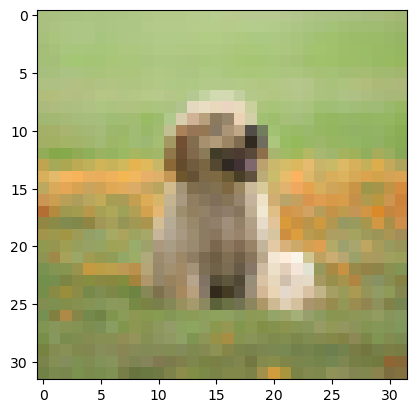

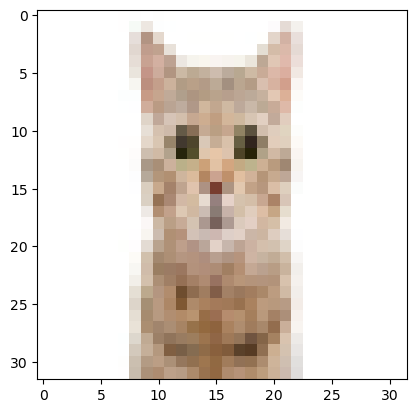

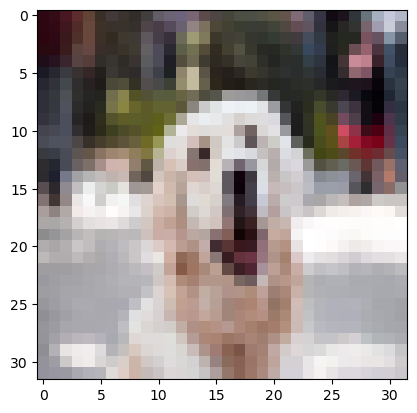

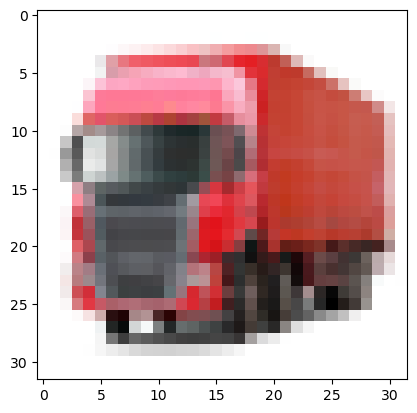

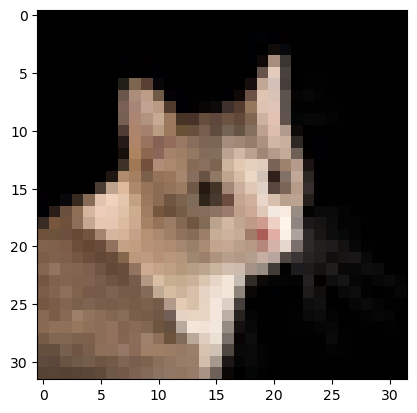

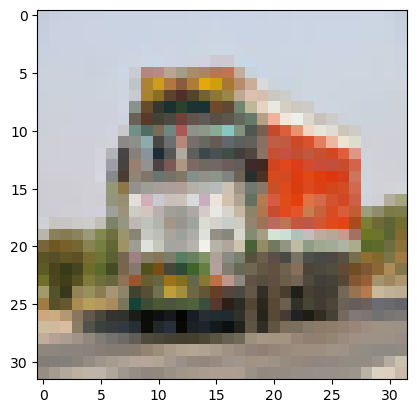

In [6]:
# Compress the images to a resolution of (3, 32, 32)

from PIL import Image

def compress_images(images, size=(32, 32)):
    compressed = []
    for img in images:
        img = Image.fromarray(img.transpose(1, 2, 0))
        img = img.resize(size)
        img = np.array(img).transpose(2, 0, 1)
        compressed.append(img)
    return np.array(compressed)

# display the images one by one

compressed = compress_images(images)
for img in compressed:
    plt.imshow(img.transpose(1, 2, 0))
    plt.show()
    plt.close()